# Example of Loading and Plotting Data

First, we will load some useful libraries to work with data. I recommend using the `pandas` library to read in tables of data. The `matplotlib` library is for basic plotting, and the `seaborn` library does some fancier statistical plots. ***Note:*** These are recommendations. You are not required to use the same libraries or do things the same way.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Just some color options for seaborn plots
sns.set(style="darkgrid")
sns.set_palette("Dark2")

Let's explore the famous iris data set. First, load it as a dataframe using pandas. ***Note:*** The `iris.csv` file will have to be in the same directory that you are running this Jupyter notebook. Get it [here](http://tomfletcher.github.io/FoDA/examples/iris.csv).

In [2]:
df = pd.read_csv("iris.csv")

# Actually, the iris data is also built into the seaborn library.
# You could load it without the csv file like this:
# df = sns.load_dataset("iris")

print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


Let's plot two of the variables, petal length and sepal length, using a scatter plot. Both of these variables are in the same units (centimeters), so it is good practice to plot the axes equally, that is, not stretched differently relative to one another.

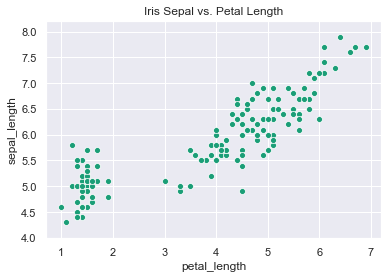

In [3]:
ax = sns.scatterplot(x = "petal_length", y = "sepal_length", data = df)
ax.axis("equal")
ax.set_title("Iris Sepal vs. Petal Length")
plt.show()

There are clearly two clusters in this data. However, we know there are three species, so we might have expected three clusters. Color coding the points by the species label will help make it clearer what is going on.

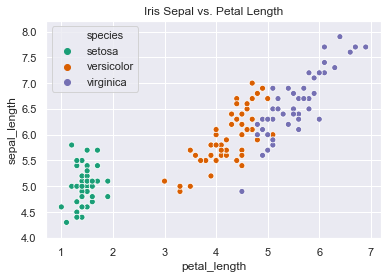

In [4]:
ax = sns.scatterplot(x = "petal_length", y = "sepal_length", hue = "species", data = df)
ax.axis("equal")
ax.set_title("Iris Sepal vs. Petal Length")
plt.show()

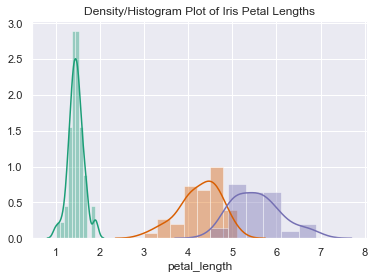

In [5]:
# This groups the data into three dataframes, one for each species
grouped = df.groupby("species")

# Pull out the column (1d array) of the petal length for each group
setosa = grouped.get_group("setosa")["petal_length"]
versicolor = grouped.get_group("versicolor")["petal_length"]
virginica = grouped.get_group("virginica")["petal_length"]

# The 'distplot' function plots a density estimate and histogram by default
sns.distplot(setosa)
sns.distplot(versicolor)
sns.distplot(virginica)

plt.title("Density/Histogram Plot of Iris Petal Lengths")
plt.show()

The next plot just changes the default settings to (1) remove the histogram, (2) show the density plot shaded in, and (3) add a "rug" plot at the bottom showing where the data points are.

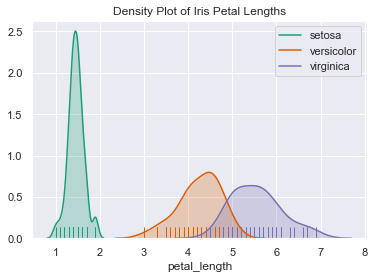

In [6]:
sns.distplot(setosa, hist = False, rug = True, kde_kws = {'shade': True}, label = "setosa")
sns.distplot(versicolor, hist = False, rug = True, kde_kws = {'shade': True}, label = "versicolor")
sns.distplot(virginica, hist = False, rug = True, kde_kws = {'shade': True}, label = "virginica")
plt.title("Density Plot of Iris Petal Lengths")
plt.show()

We've looked at petal length and sepal length, but there are two more variables in the iris data: petal and sepal width. But we only have two dimensions to work with on our computer screens! How do we plot 4D data? One strategy is a *pair plot*, which plots all pairs of variables in a matrix. In our case we have a 4x4 matrix of plots. Here we can see all pairwise comparisons between variables.

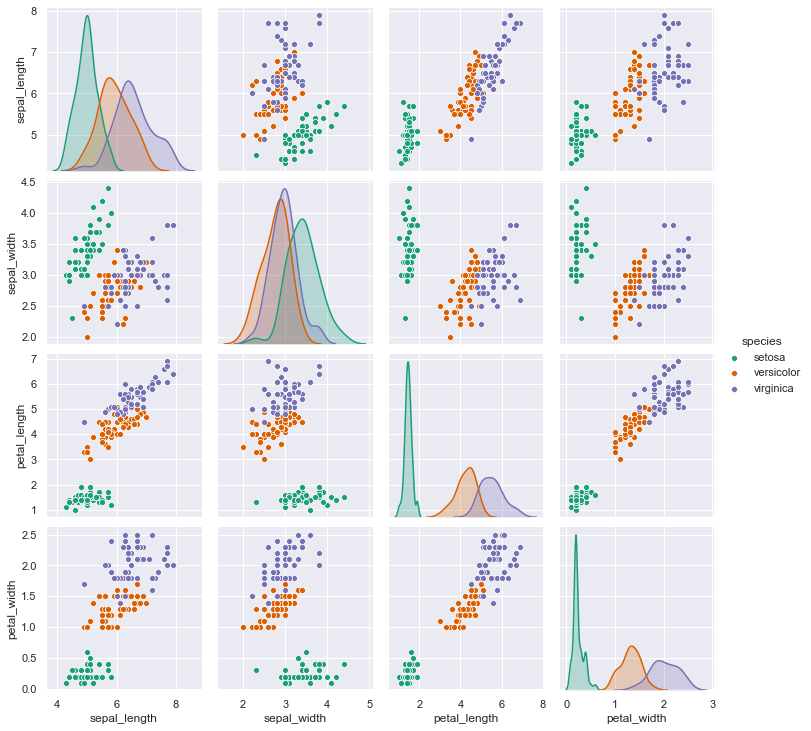

In [7]:
sns.pairplot(df, hue = "species")
plt.show()